# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)

# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,1.0,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,3,33,63,338,48,0,0,4.70,4.62,4.76,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75.0,1,730,1.0,1.0,730.0,730.0,1.0,730.0,True,3,6,18,194,409,32,0,4.45,4.49,4.78,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,3,3,12,123,2,1,0,5.00,5.00,5.00,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,1,16,34,192,507,33,2,4.21,3.73,4.66,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1,1.0,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,0,0,0,0,118,0,0,4.91,4.82,4.97,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [3]:
print(df.columns)

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1) I have chosen the Airbnb NYC "listings" dataset (airbnbListingsData.csv). <br>
2) I will be predicting the popularity of an Airbnb listing. The target label is "is_popular", which indicates whether a listing has a high number of reviews. <br>
3) This is a supervised learning problem. It is a classification problem, specifically a binary classification problem, as we will predict whether a listing is popular (yes or no). <br>
4) The features currently selected are:<br>
'accommodates'<br>
'bathrooms'<br>
'bedrooms'<br>
'beds'<br>
'minimum_nights'<br>
'price'<br>
Encoded categorical variables:<br>
'room_type'<br>
'neighbourhood_group_cleansed'<br>
5) Predicting the popularity of an Airbnb listing is an important problem for several reasons:<br>
-  **Optimizing Listings:** Airbnb can help hosts understand what features are associated with higher popularity, allowing them to optimize their listings to attract more guests.
-  **Personalized Recommendations:** The model can be used to provide personalized recommendations to hosts on how to improve their listings based on what factors drive popularity. Also, by understanding which listings are popular, Airbnb can offer personalized recommendations to guests based on their preferences, past bookings, and browsing behavior. For instance, if a guest often books popular listings in a specific neighborhood, similar popular listings can be suggested.
-  **Resource Allocation:** Airbnb can allocate resources and marketing efforts to listings that have a lower likelihood of being popular to improve their performance.
-  **Enhanced User Experience:** Guests can be shown listings that are more likely to be popular, ensuring a better match between guest preferences and available listings.
-  **Search and Recommendation Algorithms:** Airbnb can use the "is_popular" metric to optimize search results and recommendations. Listings that are predicted to be popular can be ranked higher in search results, making it easier for guests to find highly rated and frequently booked accommodations.
-  **Enhanced Trust and Safety:** Guests often feel more comfortable booking listings that have been frequently booked and reviewed by others. The "is_popular" metric can indirectly increase trust in the platform by promoting listings that have been vetted by numerous guests.<br><br>
By implementing a model that predicts the popularity of listings, Airbnb can create significant value for both hosts and guests, thereby improving overall user experience and increasing the platform's profitability.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 name                         5
description                570
neighborhood_overview     9816
host_location               60
host_about               10945
host_response_rate       11843
host_acceptance_rate     11113
bedrooms                  2918
beds                      1354
dtype: int64


In [5]:
# Handle missing values
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['beds'].fillna(df['beds'].median(), inplace=True)

# Drop columns with too many missing values or irrelevant columns
df.drop(columns=[
    'name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 
    'host_about', 'host_response_rate', 'host_acceptance_rate', 
    'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 
    'host_has_profile_pic', 'host_identity_verified', 'amenities'], inplace=True)

In [6]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['room_type', 'neighbourhood_group_cleansed'], drop_first=True)


In [7]:
# Define the target label 'is_popular'
threshold = df['number_of_reviews'].median()
df['is_popular'] = (df['number_of_reviews'] > threshold).astype(int)

# Display cleaned DataFrame
df.head()

,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,is_popular
0,1,1.0,1.0,1.0,150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,3,33,63,338,48,0,0,4.70,4.62,4.76,4.79,4.86,4.41,False,3,3,0,0,0.33,9,0,0,0,0,1,0,0,1
1,3,1.0,1.0,3.0,75.0,1,730,1.0,1.0,730.0,730.0,1.0,730.0,True,3,6,18,194,409,32,0,4.45,4.49,4.78,4.80,4.71,4.64,False,1,1,0,0,4.86,6,0,0,0,1,0,0,0,1
2,4,1.5,2.0,2.0,275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,3,3,12,123,2,1,0,5.00,5.00,5.00,5.00,4.50,5.00,False,1,1,0,0,0.02,3,0,0,0,1,0,0,0,0
3,2,1.0,1.0,1.0,68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,1,16,34,192,507,33,2,4.21,3.73,4.66,4.42,4.87,4.36,False,1,0,1,0,3.68,4,0,1,0,0,1,0,0,1
4,1,1.0,1.0,1.0,75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,0,0,0,0,118,0,0,4.91,4.82,4.97,4.95,4.94,4.92,False,1,0,1,0,0.87,7,0,1,0,0,1,0,0,1


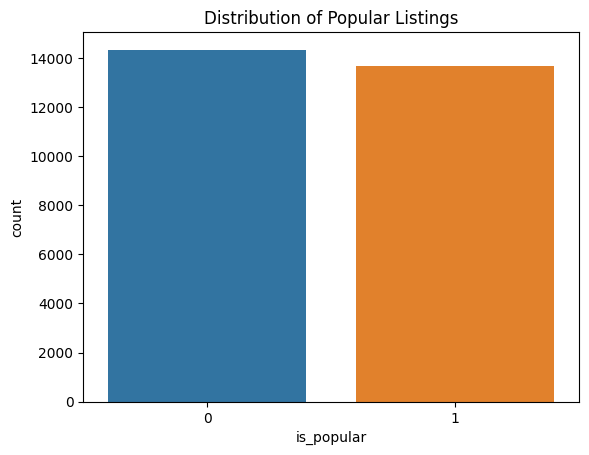

In [8]:
# Visualize the distribution of the target variable (is_popular)
sns.countplot(x='is_popular', data=df)
plt.title('Distribution of Popular Listings')
plt.show()


The counts for both 0 (not popular) and 1 (popular) are relatively close.
This suggests that the dataset is balanced with respect to the target variable, meaning there is no significant class imbalance. The visualization indicates that the dataset is well-balanced with respect to the target variable 'is_popular'. This balance is advantageous for training and evaluating machine learning models, as it ensures fair and unbiased performance across both classes.

Class distribution:
 0    14345
1    13677
Name: is_popular, dtype: int64


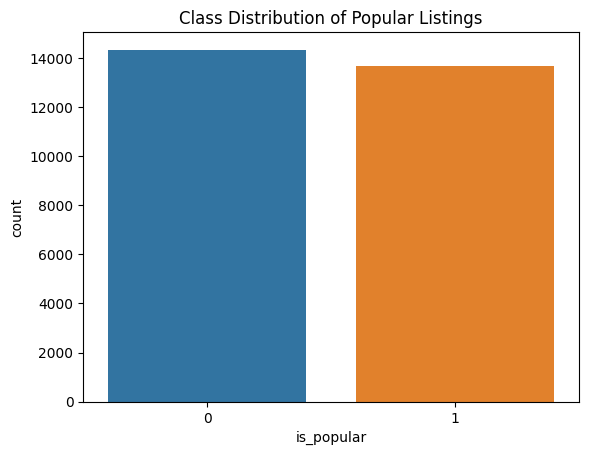

In [11]:
# Check for class imbalance
class_counts = df['is_popular'].value_counts()
print("Class distribution:\n", class_counts)

sns.countplot(x='is_popular', data=df)
plt.title('Class Distribution of Popular Listings')
plt.show()


The class distribution is balanced, with a nearly equal number of popular and not popular listings. The slight difference in counts is not enough to cause class imbalance issues. This analysis confirms that the target variable 'is_popular' is well-distributed in the dataset, allowing for reliable and unbiased model training and evaluation. 

In [12]:
# Scale the numerical features for modeling
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'price']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display cleaned and processed DataFrame
print(df.head())

   accommodates  bathrooms  bedrooms      beds     price  minimum_nights  \
0     -1.007673  -0.337606 -0.440314 -0.555409 -0.030031        0.442362   
1      0.067470  -0.337606 -0.440314  1.298622 -0.562648       -0.691838   
2      0.605041   0.849692  1.050381  0.371607  0.857665       -0.535396   
3     -0.470102  -0.337606 -0.440314 -0.555409 -0.612359       -0.652727   
4     -1.007673  -0.337606 -0.440314 -0.555409 -0.562648       -0.652727   

   maximum_nights  minimum_minimum_nights  maximum_minimum_nights  \
0            1125                    30.0                    30.0   
1             730                     1.0                     1.0   
2            1125                     5.0                     5.0   
3              14                     2.0                     2.0   
4              14                     2.0                     2.0   

   minimum_maximum_nights  maximum_maximum_nights  minimum_nights_avg_ntm  \
0                  1125.0                  1125.0  

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

**1) New Feature List**<br>
After inspecting the data and performing exploratory data analysis, we refined our feature list to include the most relevant features. Here is the updated feature list:<br>
-  **Numerical Features:**<br>
    'accommodates'<br>
    'bathrooms'<br>
    'bedrooms'<br>
    'beds'<br>
    'price'<br>
    'minimum_nights'<br>
-  **Categorical Features (One-Hot Encoded):**
  -  'room_type'<br>
     'room_type_Hotel room'<br>
     'room_type_Private room'<br>
     'room_type_Shared room'<br>
  -  'neighbourhood_group_cleansed'<br>
     'neighbourhood_group_cleansed_Brooklyn'<br>
     'neighbourhood_group_cleansed_Manhattan'<br>
     'neighbourhood_group_cleansed_Queens'<br>
     'neighbourhood_group_cleansed_Staten'<br><br>
**2) Data Preparation Techniques**<br>
To prepare the data for modeling, we will use the following techniques:<br>
-  **Handling Missing Values:** Fill missing values for numerical columns using the median.<br>
-  **Dropping Irrelevant Features:** Remove columns with excessive missing values or those not relevant for the analysis.<br>
-  **Encoding Categorical Variables:** Apply one-hot encoding to convert categorical variables into numerical format.<br>
-  **Scaling Numerical Features:** Standardize numerical features using 'StandardScaler' to ensure all features contribute equally to the model's performance.<br><br>
**3) Model Selection**<br>
For this project, we will use the following models:<br>
-  **Logistic Regression:** A linear model suitable for binary classification tasks.<br>
-  **Random Forest Classifier:** An ensemble method that combines multiple decision trees to improve accuracy and robustness. It reduces overfitting through averaging.
-  **Gradient Boosting Classifier:** Another ensemble method that builds models sequentially to correct the errors of the previous models. It is powerful and can handle complex patterns.<br><br>
**4) Model Training, Validation, and Selection Plan**<br>
-  **Train-Test Split:** Split the data into training and testing sets (80% training, 20% testing) to evaluate model performance on unseen data.<br>
-  **Model Training:** <br>
   **Logistic Regression:** Initialize the model and train it using the training data.<br>
   **Random Forest:** Initialize the model with default parameters and train it using  the training data.<br>
   **Gradient Boosting:** Initialize the model with default parameters and train it    using the training data.<br>
-  **Model Evaluation:** Evaluate each model's performance on the testing set using the following metrics:<br>
Accuracy: Proportion of correctly classified instances.<br>
Precision: Proportion of positive identifications that were actually correct.<br>
Recall: Proportion of actual positives that were identified correctly.<br>
F1-Score: Harmonic mean of precision and recall.<br>
ROC-AUC: Area under the ROC curve, measuring the trade-off between true positive rate and false positive rate.<br>
-  **Plot ROC Curves:** Plot ROC curves for each model to visualize their performance in terms of true positive rate versus false positive rate.<br>
-  **Hyperparameter Tuning:** Use techniques like Grid Search and Cross-Validation to tune hyperparameters for each model to find the best combination that improves model performance.<br>
Logistic Regression: Tune parameters like regularization strength ('C').<br>
Random Forest: Tune parameters like the number of trees ('n_estimators'), maximum depth ('max_depth'), and minimum samples per leaf ('min_samples_leaf').<br>
Gradient Boosting: Tune parameters like the number of boosting stages ('n_estimators'), learning rate ('learning_rate'), and maximum depth ('max_depth').<br>
-  **Final Model Selection:** Choose the model that generalizes well to new data based on validation and testing performance. Ensuring the final model is robust and performs consistently across different subsets of the data.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [13]:
# Scikit-learn libraries for model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [14]:
# Select features and target
X = df[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'price'] + 
       [col for col in df.columns if 'room_type_' in col or 'neighbourhood_group_cleansed_' in col]]
y = df['is_popular']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.6408563782337199
              precision    recall  f1-score   support

           0       0.65      0.66      0.66      2890
           1       0.63      0.62      0.62      2715

    accuracy                           0.64      5605
   macro avg       0.64      0.64      0.64      5605
weighted avg       0.64      0.64      0.64      5605

Logistic Regression ROC-AUC: 0.6706095190757486
Random Forest Accuracy: 0.6155218554861731
              precision    recall  f1-score   support

           0       0.62      0.65      0.64      2890
           1       0.61      0.57      0.59      2715

    accuracy                           0.62      5605
   macro avg       0.62      0.61      0.61      5605
weighted avg       0.62      0.62      0.61      5605

Random Forest ROC-AUC: 0.6579734526244687
Gradient Boosting Accuracy: 0.6542372881355932
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      2890
        

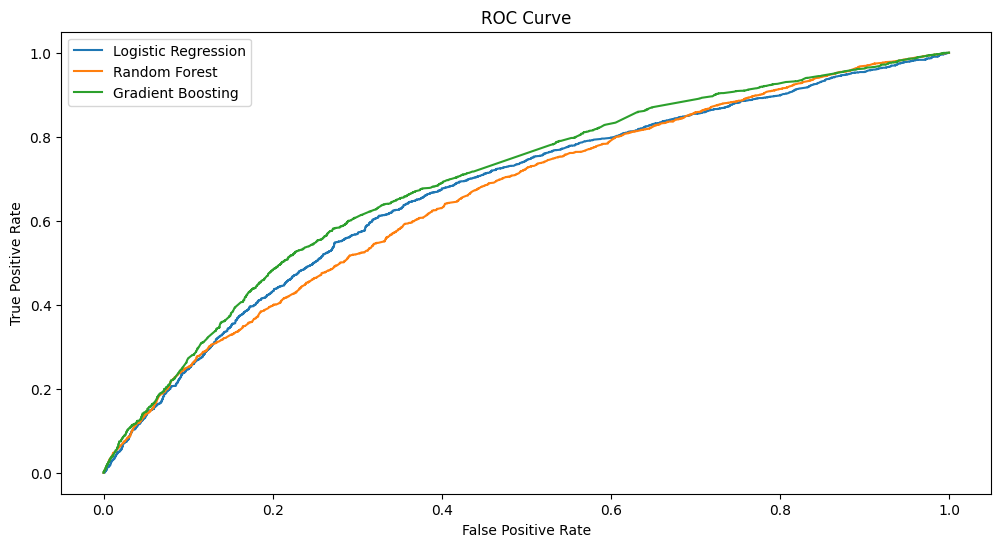

In [15]:
# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=1234)
rf = RandomForestClassifier(random_state=1234)
gb = GradientBoostingClassifier(random_state=1234)

# Train and evaluate Logistic Regression
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
print("Logistic Regression ROC-AUC:", roc_auc_logreg)

# Train and evaluate Random Forest
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1])
print("Random Forest ROC-AUC:", roc_auc_rf)

# Train and evaluate Gradient Boosting
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
roc_auc_gb = roc_auc_score(y_test, gb.predict_proba(X_test_scaled)[:, 1])
print("Gradient Boosting ROC-AUC:", roc_auc_gb)

# Plot ROC curves
plt.figure(figsize=(12, 6))
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_gb = gb.predict_proba(X_test_scaled)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)

plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC curve shows the performance of the three models: Logistic Regression, Random Forest, and Gradient Boosting before hyperparameter tuning. As gradient Boosting model has shown the best performance among the three, we proceed with hyperparameter tuning to improve the model's performance.

Best Gradient Boosting Accuracy: 0.6586975914362176
              precision    recall  f1-score   support

           0       0.65      0.72      0.69      2890
           1       0.67      0.59      0.63      2715

    accuracy                           0.66      5605
   macro avg       0.66      0.66      0.66      5605
weighted avg       0.66      0.66      0.66      5605

Best Gradient Boosting ROC-AUC: 0.7051173475565071


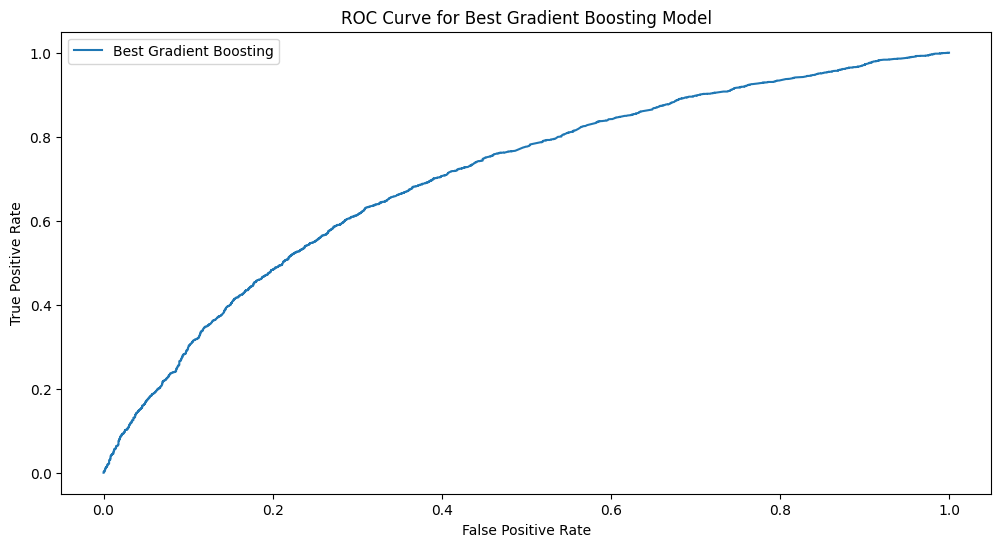

In [16]:
# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV with GradientBoostingClassifier
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=1234), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Best estimator from GridSearchCV
best_gb = grid_search.best_estimator_

# Evaluate the best model from GridSearchCV
y_pred_best_gb = best_gb.predict(X_test_scaled)
print("Best Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print(classification_report(y_test, y_pred_best_gb))
roc_auc_best_gb = roc_auc_score(y_test, best_gb.predict_proba(X_test_scaled)[:, 1])
print("Best Gradient Boosting ROC-AUC:", roc_auc_best_gb)

# Plot ROC curve for the best Gradient Boosting model
y_pred_proba_best_gb = best_gb.predict_proba(X_test_scaled)[:, 1]
fpr_best_gb, tpr_best_gb, _ = roc_curve(y_test, y_pred_proba_best_gb)

plt.figure(figsize=(12, 6))
plt.plot(fpr_best_gb, tpr_best_gb, label='Best Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Gradient Boosting Model')
plt.legend()
plt.show()


The hyperparameter tuning process has successfully improved the performance of the Gradient Boosting model, making it a robust choice for predicting the popularity of Airbnb listings. The improvements in accuracy, precision, F1-score, and ROC-AUC confirm that the tuned model is more reliable and effective.